Доверительные интервалы на основе bootstrap

In [1]:
import numpy as np
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузка данных

Время ремонта телекоммуникаций

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [3]:
data = pd.read_csv('verizon.txt', sep='\t')

In [4]:
data. shape

(1687, 2)

In [6]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [7]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

In [8]:
data['Group'].value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

In [10]:
pylab.figure(figsize=[15,10])

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

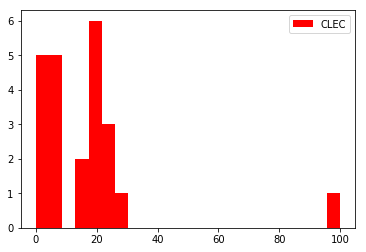

In [32]:
pylab.hist(data[data['Group']=='CLEC'].Time, bins =  len(data[data['Group']=='CLEC']), color='r', range=[0,100], label="CLEC")
pylab.legend()

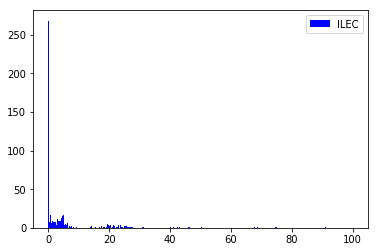

In [38]:
pylab.hist(data[data['Group']=='ILEC'].Time, bins =  len(data[data['Group']=='ILEC']), color='b', range=[0,100], label="ILEC")
pylab.legend()

In [39]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [40]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [41]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [42]:
ilec_time

array([17.5 ,  2.4 ,  0.  , ...,  4.83,  3.6 , 18.13])

In [62]:
indices = np.random.randint(0, len(data), (1000, len(data)))

In [53]:
print len(indices[1]), ' - len(data)'
print len(indices), ' - 1000'

1687  - len(data)
1000  - 1000


In [54]:
# т.е. генерируем случайные массивы длинной в Размер data, в кол-ве 1000 массивов

In [64]:
np.random.seed(0)

ilec_median_scores = map(np.median, get_bootstrap_samples(ilec_time, 1000))
clec_median_scores = map(np.median, get_bootstrap_samples(clec_time, 1000))

print "95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05)
print "95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05)

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


In [65]:
#Точечная оценка разности медиан

In [66]:
print "difference between medians:", np.median(clec_time) - np.median(ilec_time)

difference between medians: 10.74


In [68]:
#Интервальная оценка разности медиан

In [69]:
delta_median_scores = map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores))

In [70]:
print "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05)

95% confidence interval for the difference between medians [ 2.04975 16.63   ]


In [72]:
#####1

In [73]:
from scipy.stats import norm

In [77]:
x = np.linspace(norm.ppf(0.003), norm.ppf(0.997), 100)

In [78]:
x

array([-2.74778139, -2.69227065, -2.63675992, -2.58124918, -2.52573845,
       -2.47022771, -2.41471698, -2.35920624, -2.3036955 , -2.24818477,
       -2.19267403, -2.1371633 , -2.08165256, -2.02614183, -1.97063109,
       -1.91512036, -1.85960962, -1.80409889, -1.74858815, -1.69307742,
       -1.63756668, -1.58205595, -1.52654521, -1.47103448, -1.41552374,
       -1.36001301, -1.30450227, -1.24899154, -1.1934808 , -1.13797007,
       -1.08245933, -1.0269486 , -0.97143786, -0.91592713, -0.86041639,
       -0.80490566, -0.74939492, -0.69388419, -0.63837345, -0.58286272,
       -0.52735198, -0.47184125, -0.41633051, -0.36081978, -0.30530904,
       -0.24979831, -0.19428757, -0.13877684, -0.0832661 , -0.02775537,
        0.02775537,  0.0832661 ,  0.13877684,  0.19428757,  0.24979831,
        0.30530904,  0.36081978,  0.41633051,  0.47184125,  0.52735198,
        0.58286272,  0.63837345,  0.69388419,  0.74939492,  0.80490566,
        0.86041639,  0.91592713,  0.97143786,  1.0269486 ,  1.08

In [100]:
#97.5

In [105]:
0.975+0.025

1.0

In [104]:
norm.ppf([0.025, 0.975])

array([-1.95996398,  1.95996398])

In [108]:
1-0.997

0.0030000000000000027

In [109]:
1-(1-0.997)

0.997

In [110]:
norm.ppf([(1-0.997), (1-(1-0.997))])

array([-2.74778139,  2.74778139])

In [111]:
(1-0.997) + (1-(1-0.997))

1.0